# Proyecto Física Computacional I- 2019-1:

## Solución y búsqueda de caos en el Sistema de Lorenz 

## Lider Samir Galeano, Elizabeth Jiménez, Bryan Pérez

Un problema clásico de la física atmosférica es la convección de un fluido con cinemática viscosidad $ν$, coeficiente de expansión de volumen $\beta$, y coeficiente de difusión de calor $D$, en una capa de espesor $H$ en la que una diferencia de temperatura constante $\Delta T_0 = T(0)-T(H) > 0$ que persiste entre la parte superior e inferior. Casos más simples tratados
por el Señor Rayleigh ya en 1916, pero en ciertos regímenes de Prandtl $(σ = ν/β)$ y Rayleigh $(R = g\beta H^3 \Delta T_0/Dν)$, numerar la dinámica de convección (velocidad de movimiento,
transferencia de calor) se vuelve muy complejo 

el sistema de Lorenz

$$
\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align}
$$

ofrece una imagen simplificada de dicha convección. La variable $x$ representa la velocidad de la corriente de convección. La variable $y$ es proporcional a la diferencia de temperatura entre las corrientes de convección ascendente y descendente arriba, más frío baja), mientras que $z$ es la desviación del perfil de temperatura vertical de la dependencia lineal de la altura (un valor positivo implica fuertes gradientes en la cerca del borde superior o inferior).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint      # metodo de integracion scipy
from mpl_toolkits.mplot3d import Axes3D # hacer grafico 3D

#### **1.** Métodos utilizados

In [0]:
# Método odeint

def f(state, t):
    x, y, z = state
    return sigma*(y - x), x*(rho - z), x*y - beta*z

state0 = [8.5, 8.5, 27.]

t = np.arange(0., 40., 0.01)
states = odeint(f,state0, t)

# Utilizando el artículo "Runge-Kutta with Minimum Error Bounds" 

# Runge-Kutta de segundo orden.

def RK2(f,y,t,b,n):
    
    d = len(y)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/20000
    ti = 0
    
    while ti<n:
        Y[:,ti] = y
        tt[ti] = t
        
        y = y + (1/4)*h*f(t,y) + (3/4)*h*f(t + (2/3)*h, y + (2/3)*h*f(t,y))
        
        t = t + h
        ti = ti + 1 
    return Y, tt

# Runge-Kutta de Tercer orden

def RK3(f,y,t,b,n):
    
    d = len(y)
    k1 = k2 = k3 = np.zeros(d)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/n
    ti = 0
    
    while ti<n:
        Y[:,ti] = y
        tt[ti] = t
        
        k1 = h*f(t,y)
        k2 = h*f(t + 0.5*h, y + 0.5*k1)
        k3 = h*f(t + (3/4)*h, y + (3/4)*k2)
        
        y = y + (2/9)*k1 + (1/3)*k2 + (4/9)*k3
        
        t = t + h
        ti = ti + 1 
    return Y, tt

# Runge-Kutta de cuarto orden.

def RK4(f,y,t,b,n):
    
    d = len(y)
    k1 = k2 = k3 = k4 = np.zeros(d)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/n
    ti = 0
    
    while ti<n:
        Y[:,ti] = y
        tt[ti] = t
        
        k1 = h*f(t,y)
        k2 = h*f(t + 2*h/5, y + 2*k1/5)
        k3 = h*f(t + (3/5)*h, y - (3/20)*k1 + (3/4)*k2)
        k4 = h*f(t + h, y + (1/44)*(19*k1 - 15*k2 + 40*k3))
        
        y = y + (1/72)*(11*k1 + 25*k2 + 25*k3 + 11*k4)
        
        t = t + h
        ti = ti + 1 
    return Y, tt

# Utilizando el artículo "Special optimized Runge-Kutta methods for IVPs with oscillating solutions" RK6

def RK6(f,y,t,b,n):
    
    d = len(y)
    k1 = k2 = k3 = k4 = k5 = k6 = np.zeros(d)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/n
    ti = 0
    
    while ti<n:
        Y[:,ti] = y
        tt[ti] = t
        
        k1 = h*f(t,y)
        k2 = h*f(t + 32*h/129, y + 32*k1/129)
        k3 = h*f(t + (1/3)*h, y + 7*k1/64 + 43*k2/192)
        k4 = h*f(t + 0.5*h, y + 43*k1/256 - 43*k2/256 + 0.5*k3)
        k5 = h*f(t + 2*h/3, y + 23*k1/96 - 559*k2/864 + 25*k3/27 + 4*k4/27)
        k6 = h*f(t + h, y - 417*k1/704 + 1505*k2/704 + k3 - 4*k4 + 27*k5/11)
        
        y = y + 11*k1/120 + 27*k3/40 - 8*k4/15 + 27*k5/40 + 11*k6/120
        
        t = t + h
        ti = ti + 1 
    return Y, tt

# Método de Runge-Kutta-Fehlberg (RK45)

def RK45(f,y,t,b,n, Tol = 2*1E-7):
    
    d = len(y)
    k1 = k2 = k3 = k4 = k5 = k6 = np.zeros(d)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/n
    hmin = h/64
    hmax = h*64
    ti = 0
    
    while ti<n:
        
        
        k1 = h*f(t,y)
        k2 = h*f(t + h/4, y + k1/4)
        k3 = h*f(t + (3/8)*h, y + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + 0.5*h, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        
        err = (abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)).max()
        
        if ((err < Tol) or (h <= 2*hmin)):
            Y[:,ti] = y
            tt[ti] = t
        
            y = y + 25*k1/216 + 1408*k3/25650 + 2197*k4/4104 - k5/5
        
            t = t + h
            ti = ti + 1
            
            if (err == 0):
                s = 0
            else:
                s = 0.84*(Tol*h/err)**0.25
                
            if ((s<0.75) and (h > 2*hmin)):
                h = h/2
            elif ((s>1.5) and (2*h < hmax)):
                h = h*2
                
            if t > b: break
    return Y[:, 0:ti], tt[0:ti]

# Utilizando el método de Clase 

def rk6(f,y,t,b,n):
    
    d = len(y)
    k1 = k2 = k3 = k4 = k5 = k6 = np.zeros(d)
    
    tt = np.zeros(n)
    Y = np.zeros((d,n))
    h = (b-t)/n
    ti = 0
    
    while ti<n:
        Y[:,ti] = y
        tt[ti] = t
        
        k1 = h*f(t,y)
        k2 = h*f(t + h/3, y + k1/3)
        k3 = h*f(t + (3/4)*h, y + 123*k1/256 + 315*k2/256)
        k4 = h*f(t + h/5, y + 193*k1/750 + 198*k2/1250 + 176*k3/1875)
        k5 = h*f(t + 2*h/3, y + 26*k1/81 + 7*k2/15 + 304*k3/4455 + 175*k4/297)
        k6 = h*f(t + h, y - 151*k1/150 + 351*k2/250 + 304*k3/4125 + 5*k4/77 + 243*k5/175)
        
        y = y + k1/24 + 125*k4/336 + 27*k5/56 + 5*k6/48
        
        t = t + h
        ti = ti + 1 
    return Y, tt

y, T = RK2(f1,Y00,a,b,n)
y1, T = RK3(f1,Y00,a,b,n)
y2, T = RK4(f1,Y00,a,b,n)
y3, T = RK6(f1,Y00,a,b,n)
y4, T = RK45(f1,Y00,a,b,n)
y5, T = rk6(f1,Y00,a,b,n)

#### **2.** Estimación del los errores.

In [0]:
error = []
porcent = []
n1 = len(states)
n2 = len(y1)
for i in range(n1):
    for j in range(n2):
        A = np.abs(y1[j,i] - states[i,j])
        if states[i,j] != 0.0:
            porcentajerror = A / np.abs(states[i,j]*100)
            porcent.append(porcentajerror)
        error.append(A)  
        
suma = 0
for i in range(len(porcent)):
    a = porcent[i]
    suma = suma + a
    
PError = suma/len(error)

#### **3.** Metodo RK4

In [0]:
def RK4(f,yvec,t=0,h=0.01): #Metodo de runge-kutta 4
    yvec = np.array(yvec)
    K0 = h*f(t, yvec)
    K1 = h*f(t + 0.5*h, yvec + 0.5*K0)
    K2 = h*f(t + 0.5*h, yvec + 0.5*K1)
    K3 = h*f(t + h, yvec + K2)
    yvec1 = yvec + (K0+2*K1+2*K2+K3)/6.0
    return yvec1


#### **4.** Sistema de Lorenz

In [0]:
def f1(t,y): #sistema
    FR[0] = sigma * (y[1] - y[0])
    FR[1] = y[0] * (rho - y[2]) - y[1]
    FR[2] = y[0]*y[1] - beta*y[2]
    return np.array(FR)

#### **5.** Graficador para el sistema

##### **5.a.** Retrato de fase tridimensional

In [0]:
def Plotting(x): #grafica el retrato de fase tridimensional
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')    
    ax.plot(y[0],y[1],y[2], "b")
    ax.set_title('Atractor de Lorenz (Runge-Kutta %s)'%(x))
    ax.set_xlabel( '$x$' )
    ax.set_ylabel( '$y$' )
    ax.set_zlabel( '$z$' )
    plt.show()

##### **5.b.** Graficador para las series temporales


In [0]:
def TimeValues(): #Grafica el comportamiento de cada una de las coordenas espaciales respecto al tiempo
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))    
    plt.tight_layout(w_pad=3,h_pad=1,pad=3)
    fig.suptitle('Series de tiempo')
    axes[0,0].plot(T,y[0],label='$x$ vs t')
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('t')
    axes[0,0].set_ylabel('$x$')
    axes[0,1].plot(T,y[1],label='$y$ vs t',c='sienna')
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('t')
    axes[0,1].set_ylabel('$y$')
    axes[1,0].plot(T,y[2],label='$z$ vs t',c='crimson')
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('t')
    axes[1,0].set_ylabel('$z$')
    plt.show()

##### **5.c.** Graficados secciones $xy$, $xz$ y $yz$

In [0]:
def DFase(): #Grafica cada una de las secciones transversales en los planos xy, xz y yz
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))   
    plt.tight_layout(w_pad=3,h_pad=1,pad=3)
    axes[0,0].plot(y[0],y[1],label='Retrato de fase $xy$',c='indianred')
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('$x$')
    axes[0,0].set_ylabel('$y$')
    axes[0,1].plot(y[1],y[2],label='Retrato de fase $yz$',c='indigo')
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('$y$')
    axes[0,1].set_ylabel('$z$')
    axes[1,0].plot(y[0],y[2],label='Retrato de fase $xz$',c='peru')
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('$x$')
    axes[1,0].set_ylabel('$z$')
    plt.show()

#### **6.** Transformada de Fourier series de tiempo

In [0]:
def fftx():    
    plt.figure(figsize=(10,5))
    plt.title(u'FFT $x$')
    plt.plot(w[inf:sup],np.abs(xfft)[inf:sup],label = 'XFFT', c="navy")
    plt.xlabel('$\omega$')
    plt.ylabel('Intensidad')
    plt.xlim(-0.002,0.2)
    plt.grid()
    plt.show()
    plt.close()

def ffty():
    plt.figure(figsize=(10,5))
    plt.title(u'FFT $y$')
    plt.plot(w[inf:sup],np.abs(yfft)[inf:sup],label = 'YFFT',  c="navy")
    plt.xlabel('$\omega$')
    plt.ylabel('Intensidad')
    plt.xlim(-0.002,0.2)
    plt.grid()
    plt.show()
    plt.close()

def fftz():
    plt.figure(figsize=(10,5))
    plt.title(u'FFT $z$')
    plt.plot(w[inf:sup],np.abs(zfft)[inf:sup],label = 'ZFFT',  c="navy")
    plt.xlabel('$\omega$')
    plt.ylabel('Intensidad')
    plt.xlim(-0.002,0.2)
    plt.grid()
    plt.show()
    plt.close()

#### **7.** Parametros y condiciones para el atractor de Lorenz

In [0]:
tmin = 0 ; tmax = 50.   

N = 2**18 - 1                 
T = np.linspace(tmin,tmax,N)
h = (tmax-tmin)/(N-1)       


rho=28. ; beta =  8./3. ; sigma = 10. ; eps=0.001

##### **7.a.** sistema inicial (solucion 1)





In [0]:
xo, yo, zo = 0., 1., 0. #condiciones iniciales

y = [[xo],[yo],[zo]]               
FR = [0]*3

for i,t in enumerate(T):
    y0,y1,y2 = RK4(f1,[y[0][i],y[1][i],y[2][i]],t,h)
    y[0].append(y0)
    y[1].append(y1)
    y[2].append(y2)

T = list(T)
T.append(T[-1]+h)

##### **7.b.** sistema con variacion $\epsilon$ (solucion 2)

In [0]:
T = np.linspace(tmin,tmax,N)

epsi = 1e-3 #variacion de condiciones iniciales

y1 = [[xo+epsi],[yo+epsi],[zo+epsi]]               
FR = [0]*3

for i,t in enumerate(T):
    y0,ya,y2 = RK4(f1,[y1[0][i],y1[1][i],y1[2][i]],t,h)
    y1[0].append(y0)
    y1[1].append(ya)
    y1[2].append(y2)

T = list(T)
T.append(T[-1]+h)

#### **8.** Evaluacion de las transformadas de Fourier

In [0]:
xfft = np.fft.fftshift(np.fft.fft(np.array(y[0]))) # Transfomada de Fourier para x
yfft = np.fft.fftshift(np.fft.fft(np.array(y[1]))) # Transfomada de Fourier para y
zfft = np.fft.fftshift(np.fft.fft(np.array(y[2]))) # Transfomada de Fourier para z

inf = int((N+1)/2)
sup = int(51.25*(N+1)/100)

w = np.linspace(-(N+1)*h/2,(N+1)*h/2,N+1) #frecuencias

#### **9.** Diagrama de fase para los planos $xy$, $xz$ y $yz$ con variacion de condiciones iniciales

##### **9.a.** Series de tiempo

In [0]:
def TimeValues2():
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))    
    plt.tight_layout(w_pad=3,h_pad=1,pad=3)
    fig.suptitle('Series de Tiempo y Retratos de Fase')
    axes[0,0].plot(T,y[0],label='$x$ vs t')
    axes[0,0].plot(T,y1[0],label='$x_{\epsilon}$ vs t')
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('t')
    axes[0,0].set_ylabel('$x$')
    axes[0,1].plot(T,y[1],label='$y$ vs t',c='indigo')
    axes[0,1].plot(T,y1[1],label='$y_{\epsilon}$ vs t',c='r')
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('t')
    axes[0,1].set_ylabel('$y$')
    axes[1,0].plot(T,y[2],label='$z$ vs t',c='g')
    axes[1,0].plot(T,y1[2],label='$z_{\epsilon}$ vs t',c='tan')
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('t')
    axes[1,0].set_ylabel('$z$')
    plt.show()

##### **9.b.** Diagramas de fase

In [0]:
def DFase2():
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))    #4figuras
    plt.tight_layout(w_pad=3,h_pad=1,pad=3)
    axes[0,0].plot(y[0],y[1],label='Retrato de Fase $xy$',c='indianred')
    axes[0,0].plot(y1[0],y1[1],label='Retrato de Fase $(xy)_{\epsilon}$',c='navy')
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('$x$')
    axes[0,0].set_ylabel('$y$')
    axes[0,1].plot(y[1],y[2],label='Retrato de Fase $yz$',c='navy')
    axes[0,1].plot(y1[1],y1[2],label='Retrato de Fase $(yz)_{\epsilon}$',c='indianred')
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('$y$')
    axes[0,1].set_ylabel('$z$')
    axes[1,0].plot(y[0],y[2],label='Retrato de Fase $xz$',c='olive')
    axes[1,0].plot(y1[0],y1[2],label='Retrato de Fase $(xz)_{\epsilon}$',c='navy')
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('$x$')
    axes[1,0].set_ylabel('$z$')
    plt.show()

#### **10.** Secciones de Poincare

In [0]:
def PSection_Y():
    
    fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,8))   
    plt.tight_layout(w_pad=1.5,h_pad=1,pad=2)
    fig.suptitle('Secciones de Poncairé en Y')
    y0 = -20.
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[0,0].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,label='$y$ = %.1f'%(y0))
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('$x$')
    axes[0,0].set_ylabel('$z$')
    y0 = -10
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[0,1].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,c='olive',label='$y$ = %.1f'%(y0))
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('$x$')
    axes[0,1].set_ylabel('$z$')
    y0 = 0
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[0,2].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,c='tan',label='$y$ = %.1f'%(y0))
    axes[0,2].legend(loc='best')
    axes[0,2].set_xlabel('$x$')
    axes[0,2].set_ylabel('$z$')
    y0 = 10
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[1,0].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,c='forestgreen',label='$y$ = %.1f'%(y0))
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('$x$')
    axes[1,0].set_ylabel('$z$')
    y0 = 15
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[1,1].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,c='indianred',label='$y$ = %.1f'%(y0))
    axes[1,1].legend(loc='best')
    axes[1,1].set_xlabel('$x$')
    axes[1,1].set_ylabel('$z$')
    y0 = 20
    count1 = np.array(y[1]) <= y0+eps
    count2 = np.array(y[1]) >= y0-eps
    axes[1,2].scatter(np.array(y[0])[count1*count2],np.array(y[2])[count1*count2],s=5,c='navy',label='$y$ = %.1f'%(y0))
    axes[1,2].legend(loc='best')
    axes[1,2].set_xlabel('$x$')
    axes[1,2].set_ylabel('$z$')

    plt.show()

def PSection_X():
    fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,8))   
    plt.tight_layout(w_pad=1.5,h_pad=1,pad=2)
    fig.suptitle('Mapa de Poncairé para X')
    x0 = -15
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[0,0].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,label='$x$ = %.1f'%(x0))
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('$y$')
    axes[0,0].set_ylabel('$z$')
    x0 = -10
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[0,1].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,c='olive',label='$x$ = %.1f'%(x0))
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('$y$')
    axes[0,1].set_ylabel('$z$')
    x0 = -5
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[0,2].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,c='tan',label='$x$ = %.1f'%(x0))
    axes[0,2].legend(loc='best')
    axes[0,2].set_xlabel('$y$')
    axes[0,2].set_ylabel('$z$')
    x0 = 0
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[1,0].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,c='forestgreen',label='$x$ = %.1f'%(x0))
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('$y$')
    axes[1,0].set_ylabel('$z$')
    x0 = 5
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[1,1].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,c='indianred',label='$x$ = %.1f'%(x0))
    axes[1,1].legend(loc='best')
    axes[1,1].set_xlabel('$y$')
    axes[1,1].set_ylabel('$z$')
    x0 = 10
    count1 = np.array(y[0]) <= x0+eps
    count2 = np.array(y[0]) >= x0-eps
    axes[1,2].scatter(np.array(y[1])[count1*count2],np.array(y[2])[count1*count2],s=5,c='navy',label='$x$ = %.1f'%(x0))
    axes[1,2].legend(loc='best')
    axes[1,2].set_xlabel('$y$')
    axes[1,2].set_ylabel('$z$')

    plt.show()

def PSection_Z():
    fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,8))    
    plt.tight_layout(w_pad=1.8,h_pad=1,pad=2)
    fig.suptitle('Mapa de Poncairé en Z')
    z0 = 35
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[0,0].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,label='$z$ = %.1f'%(z0))
    axes[0,0].legend(loc='best')
    axes[0,0].set_xlabel('$x$')
    axes[0,0].set_ylabel('$y$')
    z0 = 30
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[0,1].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,c='olive',label='$z$ = %.1f'%(z0))
    axes[0,1].legend(loc='best')
    axes[0,1].set_xlabel('$x$')
    axes[0,1].set_ylabel('$y$')
    z0 = 25
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[0,2].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,c='tan',label='$z$ = %.1f'%(z0))
    axes[0,2].legend(loc='best')
    axes[0,2].set_xlabel('$x$')
    axes[0,2].set_ylabel('$y$')
    z0 = 20
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[1,0].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,c='forestgreen',label='$z$ = %.1f'%(z0))
    axes[1,0].legend(loc='best')
    axes[1,0].set_xlabel('$x$')
    axes[1,0].set_ylabel('$y$')
    z0 = 15
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[1,1].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,c='indianred',label='$z$ = %.1f'%(z0))
    axes[1,1].legend(loc='best')
    axes[1,1].set_xlabel('$x$')
    axes[1,1].set_ylabel('$y$')
    z0 = 10
    con1 = np.array(y[2]) <= z0+eps
    con2 = np.array(y[2]) >= z0-eps
    axes[1,2].scatter(np.array(y[0])[con1*con2],np.array(y[1])[con1*con2],s=5,c='navy',label='$z$ = %.1f'%(z0))
    axes[1,2].legend(loc='best')
    axes[1,2].set_xlabel('$x$')
    axes[1,2].set_ylabel('$y$')
    plt.show()
    

## Solucion del sistema de Lorenz 
con parametros $\sigma = 10$,  $b = \frac{8}{3}$ y $r = 28$ y condiciones iniciales $x(0) = 0$,    $\:\:y(0) = 1$ y $Z(0) = 0$. Usar el metodo RK4. Graficar el digrama de fase tridimensional  y cortes en los planos: $xy$, $xz$ y $yz$; ademas resolver el sistema con perturbaciones pequeñas en las condiciones iniciales, $Y(0) = 1 + \epsilon$ con $|\epsilon|<<1$ 

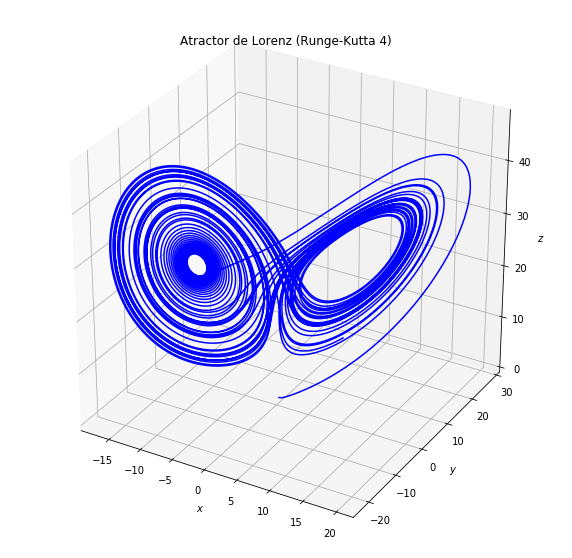

In [0]:
Plotting(4)

## Series de tiempo y cortes en los ejes $xy$, $xz$ y $yz$

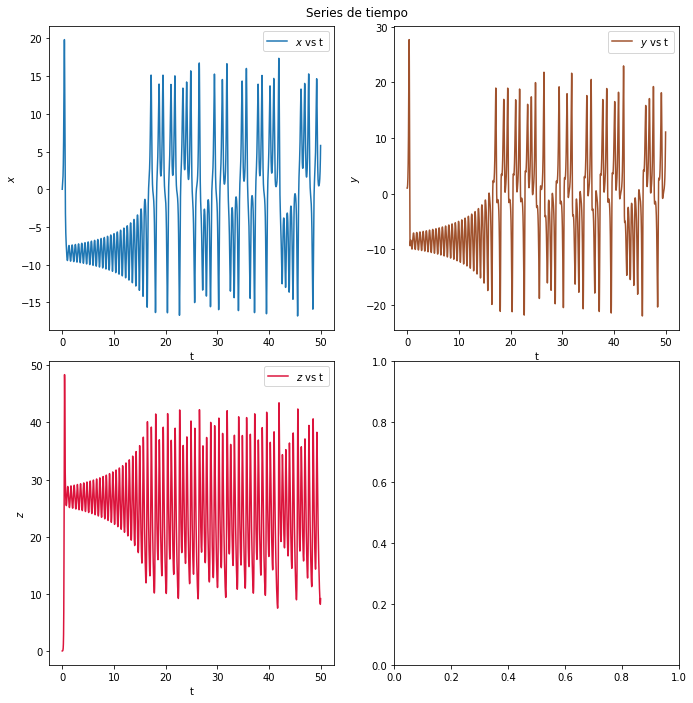

In [0]:
TimeValues()


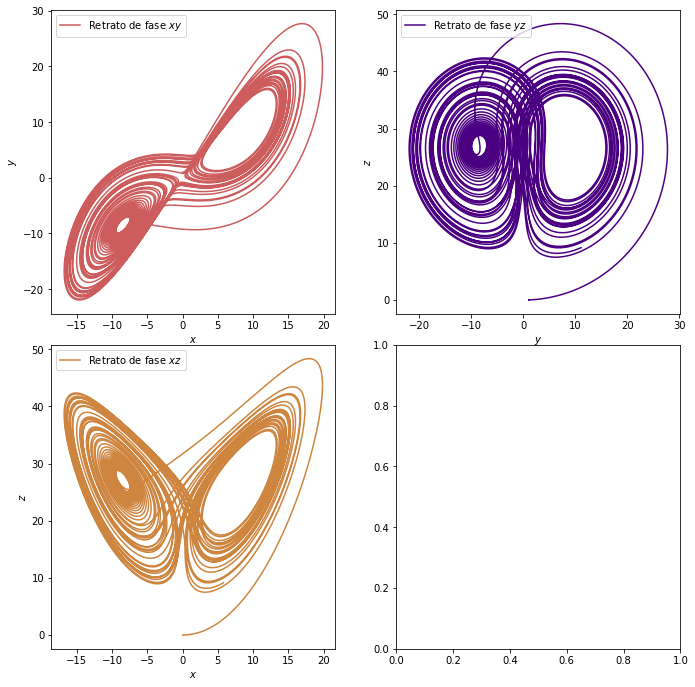

In [0]:
DFase()

## Estudio del caos y la periodicidad mediante el criterio de transformadas de Fourier.

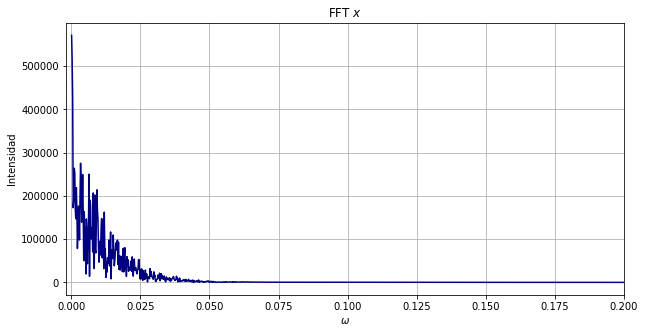

In [0]:
fftx()

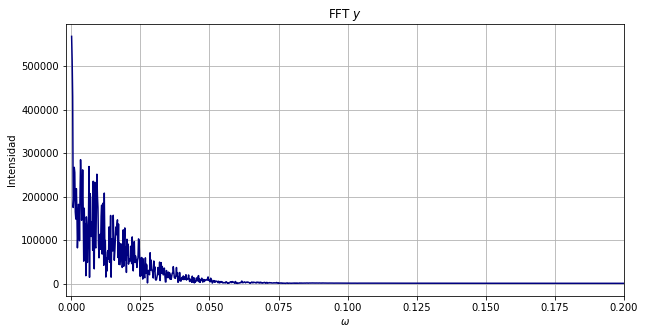

In [0]:
ffty()

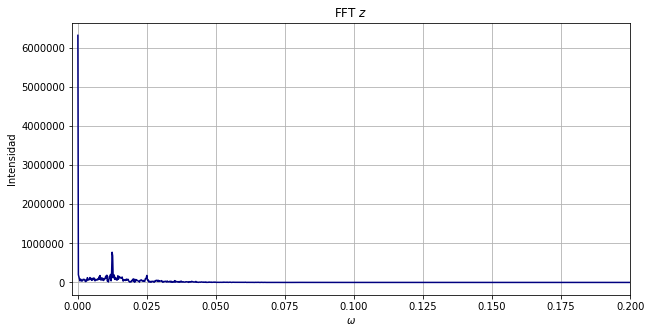

In [0]:
fftz()

## Sensibilidad a las condiciones iniciales

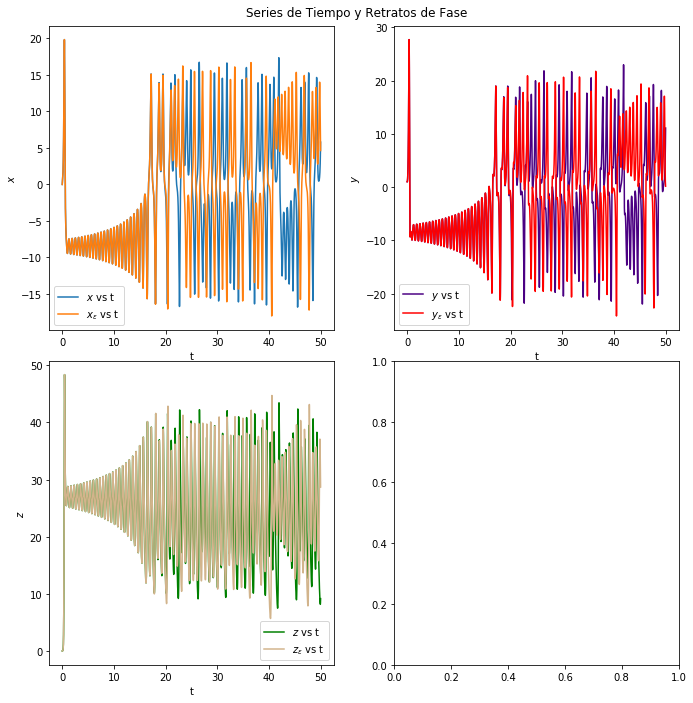

In [0]:
TimeValues2()


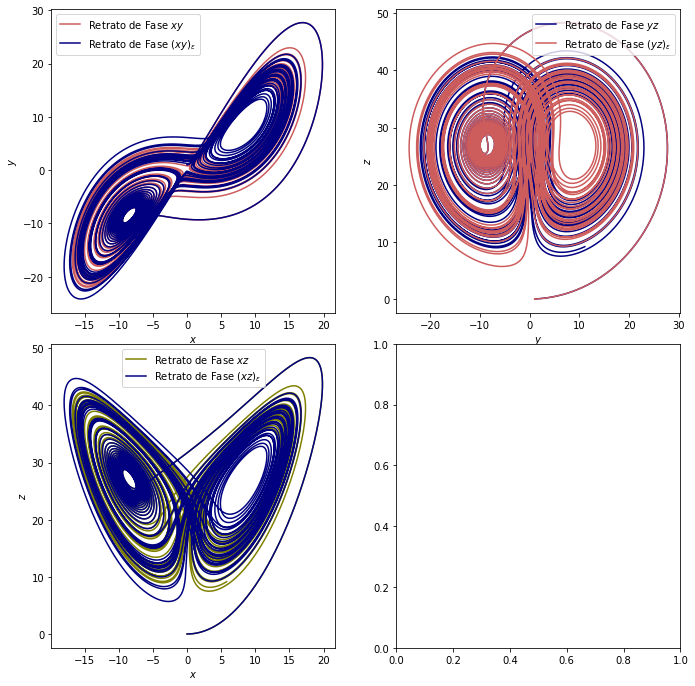

In [0]:
DFase2()

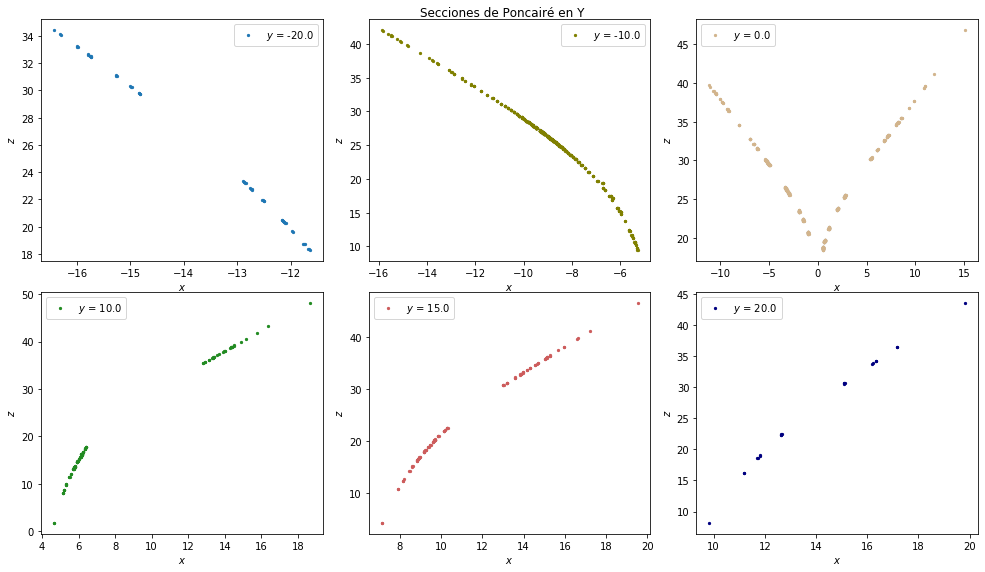

In [0]:
PSection_Y()


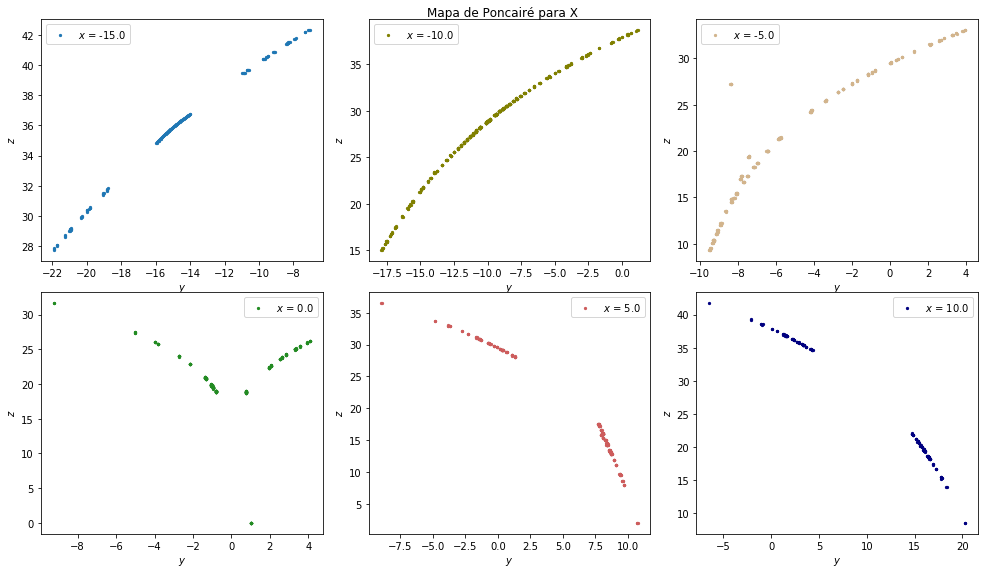

In [0]:
PSection_X()

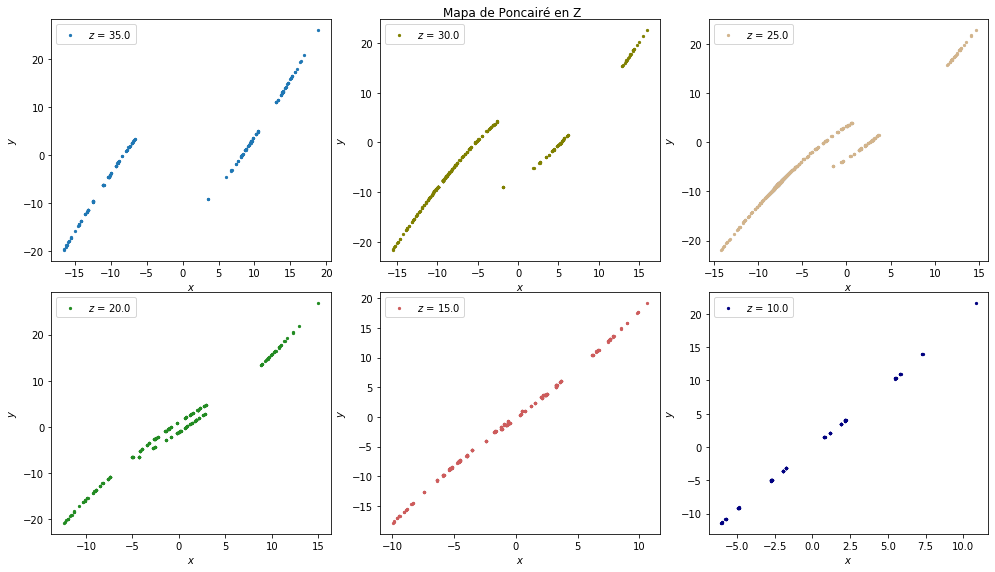

In [0]:
PSection_Z()